In [107]:
import pandas as pd
import numpy as np
from statistics import mean
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

In [122]:
df = pd.read_csv("C:/Users/Andre/Desktop/programingfiles/parksinsons disease project/parkinsons.data")
df = df.drop(['name'], axis=1)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 24)
df.head(196)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [110]:
features = df.loc[:,df.columns!='status']
labels = df.loc[:,'status']


print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


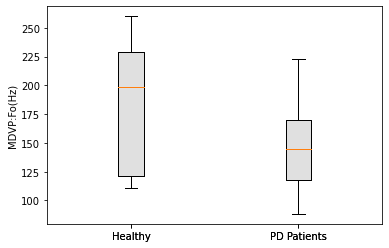

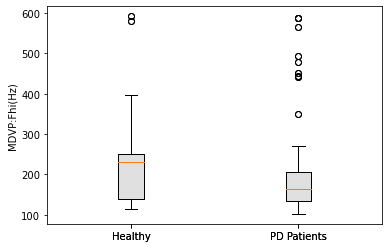

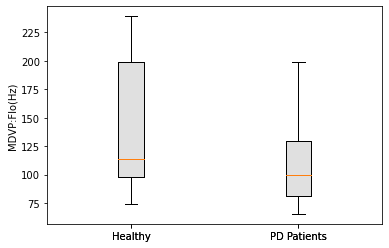

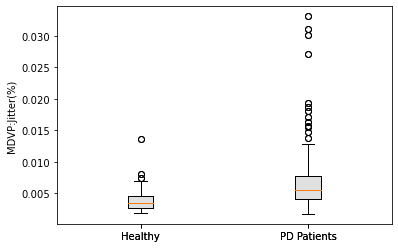

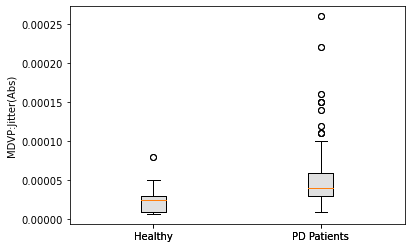

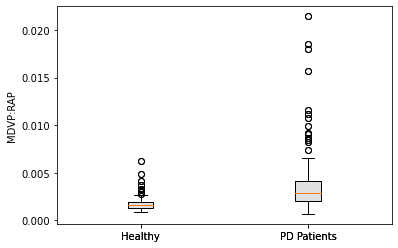

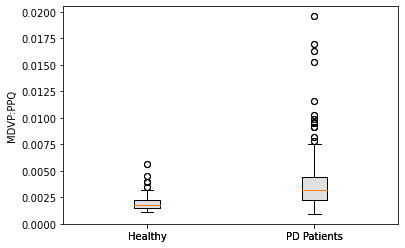

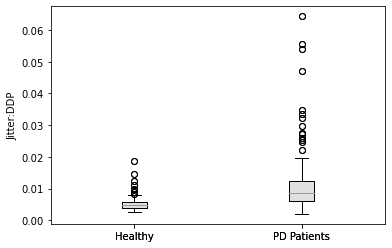

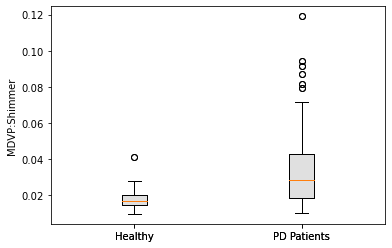

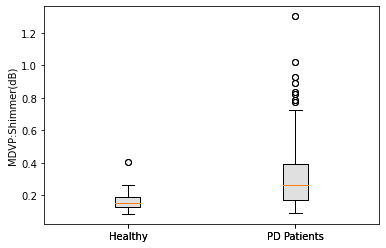

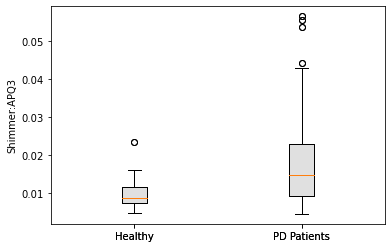

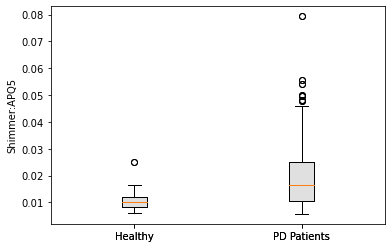

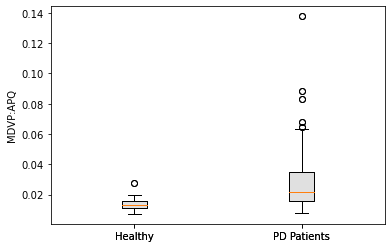

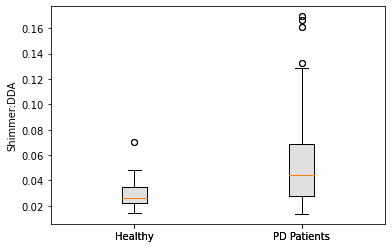

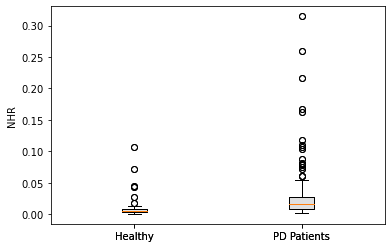

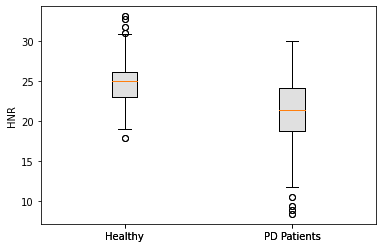

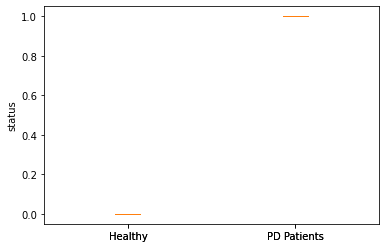

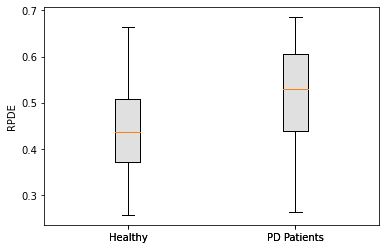

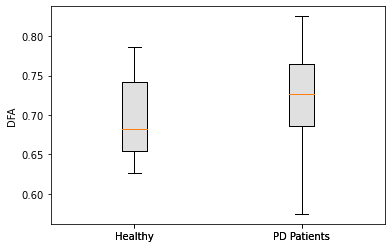

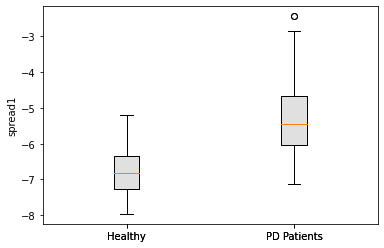

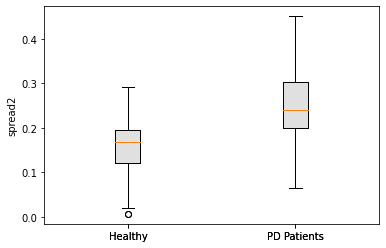

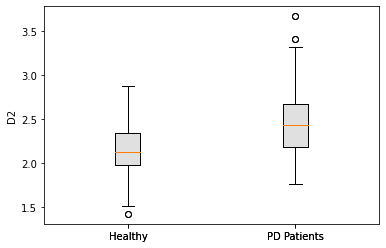

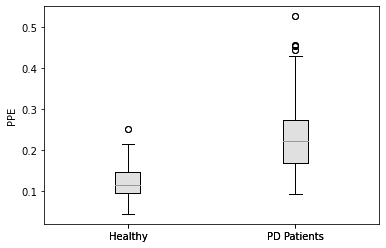

In [102]:
for i in df:
    Healthy = df.loc[df.status == 0][i]
    PD_Patients = df.loc[df.status == 1][i]
    labels = ['Healthy', 'PD Patients']
    plt.boxplot([Healthy, PD_Patients], labels = labels)
    plt.ylabel(str(i))
 
    boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

    for box in boxes['boxes']:
        box.set(facecolor = '#e0e0e0')
    plt.show()
        

C:\Users\Andre\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


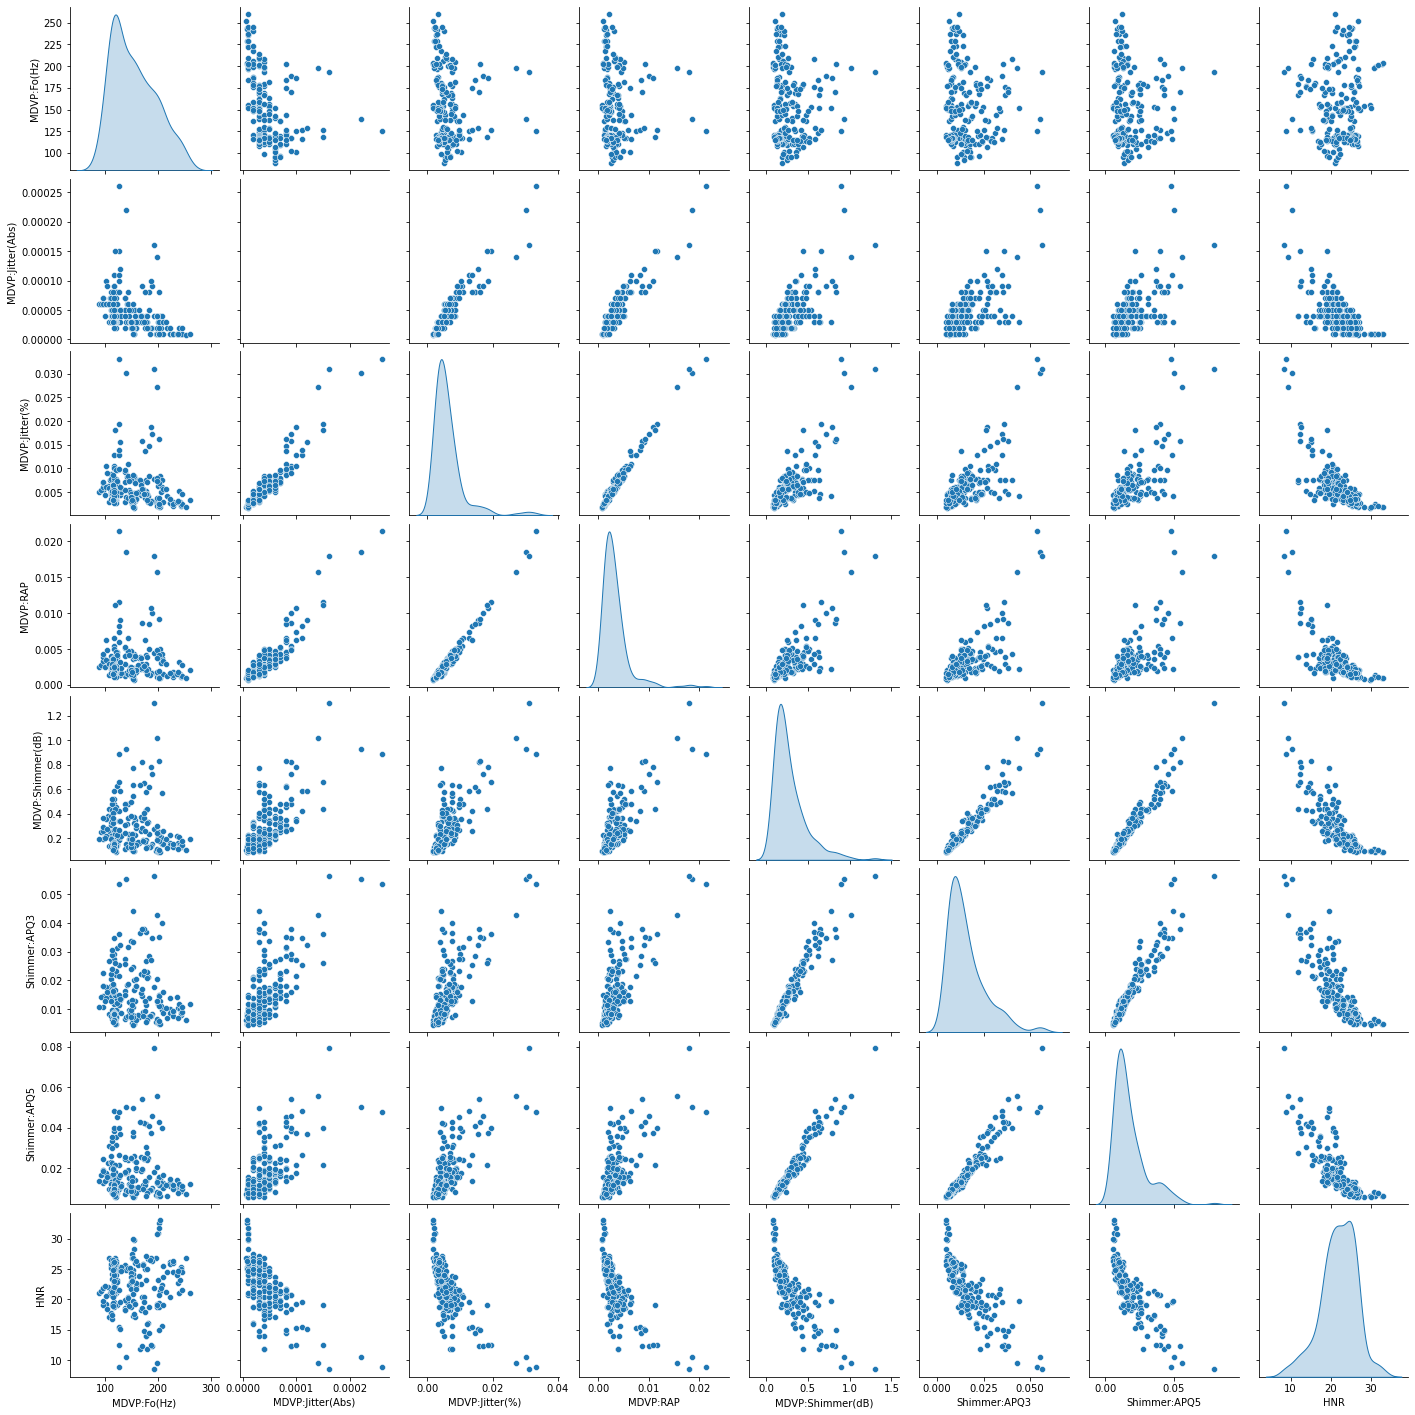

In [15]:
sns.pairplot(df[["MDVP:Fo(Hz)", "MDVP:Jitter(Abs)", "MDVP:Jitter(%)", "MDVP:RAP", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "HNR"]], diag_kind="kde")

In [111]:
scaler = MinMaxScaler((-1,1))
#x = scaler.fit_transform(features)
#y = labels

In [112]:
def num_pipe_trans(df):
    numerics = ['float64', 'int64']
    num_attrs = df.select_dtypes(include=numerics)
    numeric_pipeline = Pipeline([
        ('MinMaxscaler', MinMaxScaler())
    ])
    return num_attrs, numeric_pipeline

def fullpipe(df):
    cat_attr = ["status"]
    num_attrs, numeric_pipeline = num_pipe_trans(df)
    full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, list(num_attrs)),
        #("cat", cat_attr),
        ])
    prepared_data = full_pipeline.fit_transform(df)
    return prepared_data

def process_status(df):
    df["status"] = df["status"].map({0: "Healthy", 1: "PD_Patient"})
    return df

In [113]:
preprocessed_df = process_status(df)
trans_df_final = fullpipe(preprocessed_df)
trans_df_final

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.41509481, 0.50367281,
        0.21545975]])

In [114]:
x_train, x_test, y_train, y_test = train_test_split(trans_df_final, labels, test_size = 0.2, random_state = 7)

model = XGBClassifier()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)
print(accuracy_score(y_test, y_prediction)*100)

print(confusion_matrix(y_test, y_prediction))

precision_score(y_test, y_prediction, average='binary')*100


94.87179487179486
[[ 5  2]
 [ 0 32]]


94.11764705882352

In [115]:
scores = cross_val_score(XGBClassifier(), trans_df_final, y=labels, scoring ='accuracy', cv=5)
print(scores)

scores2 = cross_val_score(XGBClassifier(), trans_df_final, y=labels, scoring ='precision', cv=5)
print(scores)


print(mean(scores))

print(mean(scores2))

[0.82051282 0.79487179 0.92307692 0.71794872 0.82051282]
[0.82051282 0.79487179 0.92307692 0.71794872 0.82051282]
0.8153846153846154
0.8373295985060691


In [116]:
param_grid = [
    {'n_estimators': [25, 30, 35, 40],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    }]

model = XGBClassifier(gamma=0.05)

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', return_train_score=True, cv=5)
grid_search.fit(trans_df_final, labels)
grid_search.best_params_


{'learning_rate': 0.3, 'n_estimators': 25}

In [117]:
cv_scores = grid_search.cv_results_
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(mean_score, params)

0.7692307692307693 {'learning_rate': 0.1, 'n_estimators': 25}
0.7743589743589744 {'learning_rate': 0.1, 'n_estimators': 30}
0.7948717948717949 {'learning_rate': 0.1, 'n_estimators': 35}
0.8051282051282052 {'learning_rate': 0.1, 'n_estimators': 40}
0.7897435897435898 {'learning_rate': 0.2, 'n_estimators': 25}
0.7948717948717949 {'learning_rate': 0.2, 'n_estimators': 30}
0.8 {'learning_rate': 0.2, 'n_estimators': 35}
0.7948717948717949 {'learning_rate': 0.2, 'n_estimators': 40}
0.8256410256410257 {'learning_rate': 0.3, 'n_estimators': 25}
0.8205128205128205 {'learning_rate': 0.3, 'n_estimators': 30}
0.8256410256410256 {'learning_rate': 0.3, 'n_estimators': 35}
0.8205128205128205 {'learning_rate': 0.3, 'n_estimators': 40}
0.8 {'learning_rate': 0.4, 'n_estimators': 25}
0.8051282051282052 {'learning_rate': 0.4, 'n_estimators': 30}
0.8102564102564103 {'learning_rate': 0.4, 'n_estimators': 35}
0.8102564102564103 {'learning_rate': 0.4, 'n_estimators': 40}


In [125]:
feature_importances = grid_search.best_estimator_.feature_importances_
numerics = ['float64']
attr = list(df.select_dtypes(include=numerics))

df = sorted(zip(attr, feature_importances), reverse=True)
df_ordered = pd.DataFrame(df)
df = df_ordered.sort_values([1], ascending=[False])
pd.set_option('display.max_rows', 25)
df.head(25)


,0,1
6,PPE,0.277912
8,MDVP:Shimmer(dB),0.105752
1,spread1,0.087573
5,RPDE,0.081745
3,Shimmer:APQ5,0.073630
14,MDVP:Fo(Hz),0.069531
16,MDVP:Fhi(Hz),0.059679
17,MDVP:APQ,0.053163
21,D2,0.035754
10,MDVP:RAP,0.035432


In [77]:
final_model = XGBClassifier(gamma=0.05, learning_rate = 0.3, n_estimators = 25)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

final_model = final_model.fit(x_train, y_train)

final_predictions = final_model.predict(x_test)
final_score = accuracy_score(y_test, final_predictions)*100
final_score

94.87179487179486

In [126]:
import pickle

with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [127]:
patient_sample = {
    'spread2':[-4.8, 4.83],
    'spread1': [0.3, 0.28],
    'Shimmer:DDA': [0.1, 0.2],
    'Shimmer:APQ5': [0.02, 0.03],
    'Shimmer:APQ3': [0.03, 0.02],
    'RPDE': [0.4, 0.43],
}

In [180]:
bsample = {'MDVP:Fo(Hz)':[], 'MDVP:Fhi(Hz)':[24], 'MDVP:Flo(Hz)':[24], 'MDVP:Jitter(%)':[24], 'MDVP:Jitter(Abs)':[24], 'MDVP:RAP':[24], 'MDVP:PPQ':[24], 'Jitter:DDP':[24], 'MDVP:Shimmer':[24], 'MDVP:Shimmer(dB)':[24], 'Shimmer:APQ3':[24], 'Shimmer:APQ5':[24], 'MDVP:APQ':[24], 'Shimmer:DDA':[24], 'NHR':[24], 'HNR':[24], 'RPDE':[24], 'DFA':[24], 'spread1':[24], 'spread2':[24], 'D2':[24], 'PPE':[24]}
if [] in bsample == True:
    bsample.append(np.nan)
    bsample

TypeError: unhashable type: 'list'

In [128]:
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

In [166]:
def predict_status(sample, ml_model):
    if type(sample) == dict:
        data = pd.DataFrame(sample)
    else:
        data = sample
    
    
   
    
    print(data)
    predictions = ml_model.predict(data)  
    
    result = {
        'status_prediction': list(predictions)
    }
    return result
    
predict_status(bsample, model)

  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0                        24            24              24                24   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0        24        24          24            24                24   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  \
0            24            24        24           24   24   24    24   24   

   spread1  spread2  D2  PPE  
0       24       24  24   24  


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields MDVP:Fo(Hz)